# Deep Learning for Time Series Forecasting: 7-Day Crash Course 
## Lesson 5 Exercise: LSTM for Time Series Forecasting
This workbook constructs, trains, and tests an LSTM model using the daily-total-female-births dataset listed in the course materials.
This workbook reads in processed data from the Lesson 2 workbook in this same repository and produces accuracy and loss plots for the trained model.
Attributions for additional libraries are found at the end.

In [7]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import LSTM, Dense
from livelossplot import PlotLossesKeras
from keras import optimizers
import keras

## Data Import

In [3]:
inputs = pd.read_csv('inputs.csv')
inputs = inputs.as_matrix()
X = inputs.reshape((inputs.shape[0], inputs.shape[1], 1))
outputs = pd.read_csv('outputs.csv')

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


## Model

In [36]:
keras.backend.clear_session()
model = Sequential()
model.add(LSTM(50, activation='sigmoid', input_shape=(X.shape[1], X.shape[2]),return_sequences=True))
model.add(LSTM(50, activation='sigmoid'))
model.add(Dense(1))

In [37]:
epochs = 500
learning_rate = 0.001
opt_function = optimizers.Adam(lr=learning_rate)
model.compile(optimizer=opt_function, loss='mse', metrics=['accuracy'])

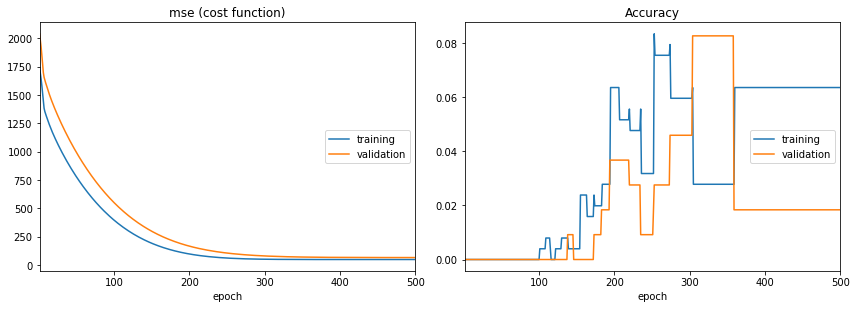

Model trained


In [38]:
trained_model = model.fit(X, outputs, epochs=epochs, verbose=0, validation_split=0.3, callbacks=[PlotLossesKeras()])
print('Model trained')